In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
real = pd.read_csv("True.csv")
fake = pd.read_csv("Fake.csv")

In [5]:
#Displayed the first 5 rows of the real news dataset
real.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [6]:
#Displayed the first 5 rows of the fake news dataset
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [7]:
#Shape of real news dataset
print("Real news: ",real.shape)
#Shape of fake news dataset
print("Fake News: ", fake.shape)

Real news:  (21417, 4)
Fake News:  (23481, 4)


In [8]:
#Assigning a value of 0 for all real news data and placing it in the dataframe
class0 = []

for i in range(21417):
  class0.append(0)

real.insert(4, "class", class0, True)

In [9]:
#Assigning a value of 1 for all fake news data and placing it in the dataframe
class1 = []

for i in range(23481):
  class1.append(1)

fake.insert(4, "class", class1, True)

In [10]:
#Concactenating fake news and real news into 1 total dataset
total = pd.concat([real,fake])
total = total.sample(frac = 1)

In [11]:
#Shape of total
total.shape

(44898, 5)

In [12]:
#total = total.sample(frac=1)
pd.set_option('display.width', total.shape[0])
total.head()


,title,text,subject,date,class
5549,Man Falsely ID’d As Dallas Shooter Says Cops ...,"Whether you realize it or not, the Second Amen...",News,"July 8, 2016",1
7879,Trump says he disagrees with his running mate ...,ST. LOUIS (Reuters) - Republican Donald Trump ...,politicsNews,"October 10, 2016",0
16008,Brexit minister says 'basic' EU deal likely ev...,LONDON (Reuters) - Brexit minister David Davis...,worldnews,"October 31, 2017",0
7627,State Department says FBI has not approached i...,WASHINGTON (Reuters) - A U.S. State Department...,politicsNews,"October 31, 2016",0
20216,"Give us some clarity on Brexit, French ministe...",LONDON (Reuters) - The British government need...,worldnews,"September 13, 2017",0


In [13]:
#Extract only the values for title (input) and class (output)
data = total[['title','class']]
data.head()


,title,class
5549,Man Falsely ID’d As Dallas Shooter Says Cops ...,1
7879,Trump says he disagrees with his running mate ...,0
16008,Brexit minister says 'basic' EU deal likely ev...,0
7627,State Department says FBI has not approached i...,0
20216,"Give us some clarity on Brexit, French ministe...",0


In [14]:
# Character Length of Titles - Min, Mean, Max
print('Mean Length', data['title'].apply(len).mean())
print('Min Length', data['title'].apply(len).min())
print('Max Length', data['title'].apply(len).max())

Mean Length 80.11171989843646
Min Length 8
Max Length 286


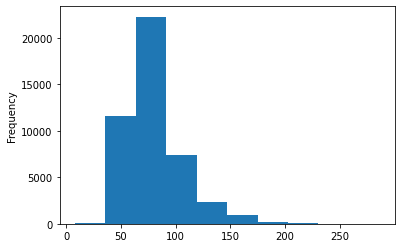

In [15]:
#plotting the frequency of characters on a histogram
import seaborn as sns

x = data['title'].apply(len).plot.hist()

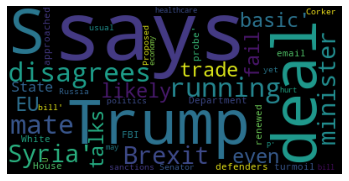

In [16]:
#Word cloud of most common words from real news 
#For fake news, change ["class"] == 0 to 1
from wordcloud import WordCloud, STOPWORDS

#Note to self: fix for entire dataset
text = data[data["class"] == 0].values
wc = WordCloud(stopwords=STOPWORDS).generate(str(text))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [17]:
#Extracting numpy arrays for the title and classes
titles = data["title"].values
labels = data["class"].values

In [18]:
#Data Preprocessing


#Lowercase letters
data['title'] = data['title'].str.lower()
data.head()


#Ensure that all necessary punctuations are in one list
#Include ' and " as they are not default

import string
#Fix this (note to self)
punc = list(string.punctuation)
punc.append('\'')
punc.append('"')
print(punc)


#Loop through dataframe and remove all punctuations
def removePunc(text):
    for i in string.punctuation:
        text = text.replace(i, '')
    return text


# Apply to the DF series
data['title'] = data['title'].apply(removePunc)
data.head()


#Import nltk preprocessing library to convert text into a readable format
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
from nltk.tokenize import sent_tokenize


#Tokenize the string (create a list -> each index is a word)
data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
data.head()

#Define text lemmatization model (eg: walks will be changed to walk)
from nltk.stem import WordNetLemmatizer 
lemmatizer = WordNetLemmatizer()


#Loop through title dataframe and lemmatize each word
def lemma(data):
  return [lemmatizer.lemmatize(w) for w in data]

#Apply to dataframe
data['title'] = data['title'].apply(lemma)

data.head()



#Define all stopwords in the English language (it, was, for, etc.)
from nltk.corpus import stopwords

stop = stopwords.words('english')
print(stopwords)
#Remove them from our dataframe
data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])





data.head()

C:\Users\astro\AppData\Local\Temp/ipykernel_15012/1705681334.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].str.lower()
C:\Users\astro\AppData\Local\Temp/ipykernel_15012/1705681334.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(removePunc)


['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']


[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading wordnet: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
[nltk_data] Error loading stopwords: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>
C:\Users\astro\AppData\Local\Temp/ipykernel_15012/1705681334.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data.apply(lambda row: nltk.word_tokenize(row['title']), axis=1)
C:\Users\astro\AppData\Local\Temp/ipykernel_15012/1705681334.py:54: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https:

<WordListCorpusReader in 'C:\\Users\\astro\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>


C:\Users\astro\AppData\Local\Temp/ipykernel_15012/1705681334.py:66: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['title'] = data['title'].apply(lambda x: [i for i in x if i not in stop])


,title,class
5549,"[man, falsely, id, ’, dallas, shooter, say, co...",1
7879,"[trump, say, disagrees, running, mate, syria]",0
16008,"[brexit, minister, say, basic, eu, deal, likel...",0
7627,"[state, department, say, fbi, ha, approached, ...",0
20216,"[give, u, clarity, brexit, french, minister, g...",0


In [19]:
from sklearn.model_selection import train_test_split
title_train, title_test, y_train, y_test = train_test_split(titles, labels, test_size=0.2, random_state=1000)

In [20]:
from gensim.models import Word2Vec
#Create a word2vec model
vec = Word2Vec(min_count=1)
#Build its vocabulary by looping through the title dataset
vec.build_vocab([x for x in data['title'].values])

In [21]:
print(len(vec.wv.index_to_key))
vec.train([x for x in data['title'].values],total_examples=vec.corpus_count,epochs=10)

22951


(4040608, 4510640)

In [22]:
#Word vectors for the selected word
vec1 = vec.wv.key_to_index.keys()
for word in vec1:
    vec.wv.get_index(word)

In [23]:
#Most similar word vectors to another one
vec.wv.most_similar("florida")

[('virginia', 0.8573786616325378),
 ('michigan', 0.8501384854316711),
 ('va', 0.8170447945594788),
 ('louisiana', 0.8118878602981567),
 ('poisoning', 0.8054393529891968),
 ('mississippi', 0.8050315380096436),
 ('kansa', 0.8021742105484009),
 ('mln', 0.7976198792457581),
 ('california', 0.7921932339668274),
 ('stresstest', 0.7893022298812866)]

In [24]:
#Shape of the word vectors
vec.wv.vectors.shape

(22951, 100)

In [25]:
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

tags = [TaggedDocument(doc, [i]) for i, doc in enumerate(title_train)]

doc = Doc2Vec(tags,vector_size=100,min_count=1,epochs=5)
doc.train(tags, total_examples=doc.corpus_count,epochs=doc.epochs)

In [26]:
print(len(doc.wv.key_to_index))

21284


In [27]:
train_vectors = [doc.infer_vector(i) for i in title_train]

In [28]:
test_vectors = [doc.infer_vector(i) for i in title_test]

In [29]:
train_vectors = np.array(train_vectors)
test_vectors = np.array(test_vectors)

In [31]:
len(doc.wv.key_to_index)

21284

In [32]:
train_vectors.shape

(35918, 100)

In [33]:
print(train_vectors)

[[-1.2687032e-02  3.3692263e-02 -5.9313835e-03 ... -1.8528955e-02
  -7.0406096e-03 -8.1080422e-03]
 [-5.0100237e-02  2.1701345e-02  3.4052137e-02 ...  4.8337325e-02
   9.8391436e-03  3.5004709e-02]
 [ 2.7317720e-02  1.7247578e-02  1.0375360e-02 ... -1.9414272e-05
  -7.4244547e-03  1.2316409e-02]
 ...
 [-3.2660137e-03  1.1527349e-02  6.9064563e-03 ...  7.5897314e-03
   2.8070230e-02 -6.4790840e-03]
 [-4.1477955e-03 -4.6266220e-03 -1.4940746e-02 ... -7.5933291e-03
   1.7463337e-04 -3.3406332e-02]
 [ 2.9243058e-02  3.1473268e-02 -2.2618653e-02 ... -1.2114157e-02
   1.3258511e-02  4.4709284e-02]]


In [34]:
import tensorflow as tf
model = tf.keras.Sequential()

model.add(tf.keras.layers.Dense(128,input_shape=[100],activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(64,activation='relu'))
model.add(tf.keras.layers.Dense(32,activation='relu'))
model.add(tf.keras.layers.Dense(16,activation='relu'))
model.add(tf.keras.layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate = 1e-4),loss="binary_crossentropy", metrics=['accuracy'])

In [35]:
hist = model.fit(train_vectors,y_train,validation_data=[test_vectors,y_test],epochs=25)

Epoch 1/25
1123/1123 [==============================] - 5s 3ms/step - loss: 0.5124 - accuracy: 0.7703 - val_loss: 0.4083 - val_accuracy: 0.8129
Epoch 2/25
1123/1123 [==============================] - 3s 3ms/step - loss: 0.4061 - accuracy: 0.8145 - val_loss: 0.3909 - val_accuracy: 0.8207
Epoch 3/25
1123/1123 [==============================] - 2s 2ms/step - loss: 0.3869 - accuracy: 0.8247 - val_loss: 0.3747 - val_accuracy: 0.8262
Epoch 4/25
1123/1123 [==============================] - 2s 2ms/step - loss: 0.3716 - accuracy: 0.8331 - val_loss: 0.3597 - val_accuracy: 0.8362
Epoch 5/25
1123/1123 [==============================] - 2s 2ms/step - loss: 0.3602 - accuracy: 0.8396 - val_loss: 0.3510 - val_accuracy: 0.8406
Epoch 6/25
1123/1123 [==============================] - 2s 2ms/step - loss: 0.3497 - accuracy: 0.8446 - val_loss: 0.3450 - val_accuracy: 0.8464
Epoch 7/25
1123/1123 [==============================] - 2s 2ms/step - loss: 0.3448 - accuracy: 0.8479 - val_loss: 0.3383 - val_accuracy:

In [36]:
hist_dict  = hist.history
acc = hist_dict['accuracy']
val_acc=hist_dict['val_accuracy']
loss = hist_dict['loss']
val_loss=hist_dict['val_loss']

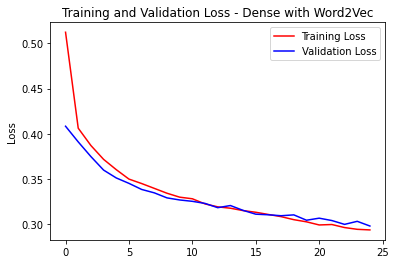

In [39]:
plt.subplot()
plt.plot(loss,'r',label='Training Loss')
plt.plot(val_loss,'b',label='Validation Loss')
plt.title('Training and Validation Loss - Dense with Word2Vec')
plt.ylabel('Loss')
plt.legend()

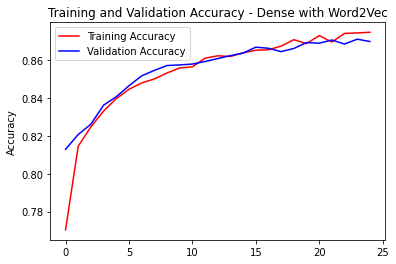

In [40]:
plt.subplot()
plt.plot(acc,'r',label='Training Accuracy')
plt.plot(val_acc,'b',label='Validation Accuracy')
plt.title('Training and Validation Accuracy - Dense with Word2Vec')
plt.ylabel('Accuracy')
plt.legend()

In [38]:
model.evaluate(title_train,y_test)

ValueError: Failed to convert a NumPy array to a Tensor (Unsupported object type list).

In [35]:
train_vectors.shape

(35918, 100)

In [41]:
#Algorithm used to preprocess a new sentence


#New sentence for the model
sentence = "Jishnu is a student"

#Lowercase words
sentence = sentence.lower()

#Ensure that all necessary punctuations are in one list
#Include ' and " as they are not default
punc = list(string.punctuation)
punc.append('\'')
punc.append('"')
print(punc)

#Loop through sentence and remove all punctuations
for i in string.punctuation:
  sentence = sentence.replace(i, '')
    
#Tokenize sentence -> all words in a new list
tok = sentence.split(' ')

#Define text lemmatization model (eg: walks will be changed to walk)
lemmatizer = WordNetLemmatizer()

#Lemmatize each word in the sentence
for w in sentence:
  lemmatizer.lemmatize(sentence)




#Define all stopwords in the English language (it, was, for, etc.)
stop = stopwords.words('english')




#Remove them from our dataframe and store in a new list
minStop = []

for i in tok:
  if i not in stop:
    minStop.append(i)

#Doc2Vec tags
tag = [TaggedDocument(minStop,[0])]

predVec = [doc.infer_vector(minStop)]
predVec = np.array(predVec)

print(predVec)

['!', '"', '#', '$', '%', '&', "'", '(', ')', '*', '+', ',', '-', '.', '/', ':', ';', '<', '=', '>', '?', '@', '[', '\\', ']', '^', '_', '`', '{', '|', '}', '~', "'", '"']
[[-0.01511334  0.00969949  0.00123394  0.0009722   0.00292815 -0.02013228
   0.01010535  0.02576808 -0.01912514 -0.00800835 -0.00342072 -0.02164701
   0.00566118  0.01339273 -0.00356139 -0.01636184  0.00813936 -0.017919
  -0.00181024 -0.0266919   0.0016277   0.00251131  0.01309513  0.00143541
  -0.00065555  0.00121922 -0.01227597  0.00254465 -0.00983395  0.00078243
   0.01896969  0.00480075  0.00359368  0.00011691  0.00057276  0.02182144
   0.00238495 -0.00509769 -0.00600604 -0.0180552  -0.00378591 -0.00988749
  -0.01092851 -0.00959692  0.00548008 -0.00208967 -0.02680216  0.00137726
   0.00179629  0.00724519  0.0111428  -0.00911123 -0.0060609   0.00413089
  -0.00559526  0.0016531   0.01533253 -0.00199702 -0.01596882  0.00453668
  -0.00446004  0.00186994  0.00628194 -0.00118678 -0.01662509  0.00088774
  -0.00020187  0

In [42]:
predVec.shape

(1, 100)

In [43]:
#predicting the probability of fake news on our field data
prediction = model.predict(predVec)
print(prediction)



1/1 [==============================] - 0s 29ms/step
[[0.14349943]]


In [44]:
import pickle 

pickle.dump(model, open('model.pkl','wb'))

INFO:tensorflow:Assets written to: ram://be2483a9-258d-473d-95a0-a0e187fcebf4/assets


In [45]:
pickle.dump(doc,open('doc.pkl','wb'))


In [46]:
from keras.models import load_model
model.save('model(1).h5')
model_final = load_model('model(1).h5')